1. Start the EDA by importing the necessary Python libraries.

2. Perform data quality check to identify any missing values or incorrect data types.

3. Analyze the distribution of numerical features to understand their distribution.

4. Plot distributions for numerical features.

5. Explore the categorical features to understand their distribution.

6. Plot the counts of each category for the categorical features.

7. Give Analysis Summary for Categorical and Numerical Features.

8. Perform Bivariate Analysis to explore the relationships between the target variable
(Historical_Cost_of_Ride) and the other features. (Hint: use scatter plots of numerical features against the Historical_Cost_of_Ride).

9. Examine how the categorical features relate to the Historical_Cost_of_Ride (Hint: use box plots to explore the variance in ride costs across different categories).

10. Give a short summary of insights gathered from EDA for Feature Selection and list the features identified as potentially important for predicting ride costs.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset Files/dynamic_pricing.csv')
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [ ]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
data.shape

(1000, 10)

In [ ]:
data.nunique()

,0
Number_of_Riders,81
Number_of_Drivers,79
Location_Category,3
Customer_Loyalty_Status,3
Number_of_Past_Rides,101
Average_Ratings,151
Time_of_Booking,4
Vehicle_Type,2
Expected_Ride_Duration,171
Historical_Cost_of_Ride,1000


In [ ]:
data.describe(include = object)

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


In [ ]:
data.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


In [ ]:
data['Time_of_Booking']

,Time_of_Booking
0,Night
1,Evening
2,Afternoon
3,Afternoon
4,Afternoon
...,...
995,Morning
996,Morning
997,Night
998,Night


In [ ]:
data['Expected_Ride_Duration']

,Expected_Ride_Duration
0,90
1,43
2,76
3,134
4,149
...,...
995,11
996,94
997,40
998,58


In [ ]:
data['Vehicle_Type']

,Vehicle_Type
0,Premium
1,Economy
2,Premium
3,Premium
4,Economy
...,...
995,Premium
996,Premium
997,Premium
998,Premium


In [ ]:
data['Location_Category']

,Location_Category
0,Urban
1,Suburban
2,Rural
3,Rural
4,Rural
...,...
995,Urban
996,Urban
997,Suburban
998,Suburban


In [ ]:
data['Customer_Loyalty_Status']

,Customer_Loyalty_Status
0,Silver
1,Silver
2,Silver
3,Regular
4,Regular
...,...
995,Gold
996,Regular
997,Gold
998,Regular


In [ ]:
data.duplicated().sum()

0

Plot distributions for numerical features.

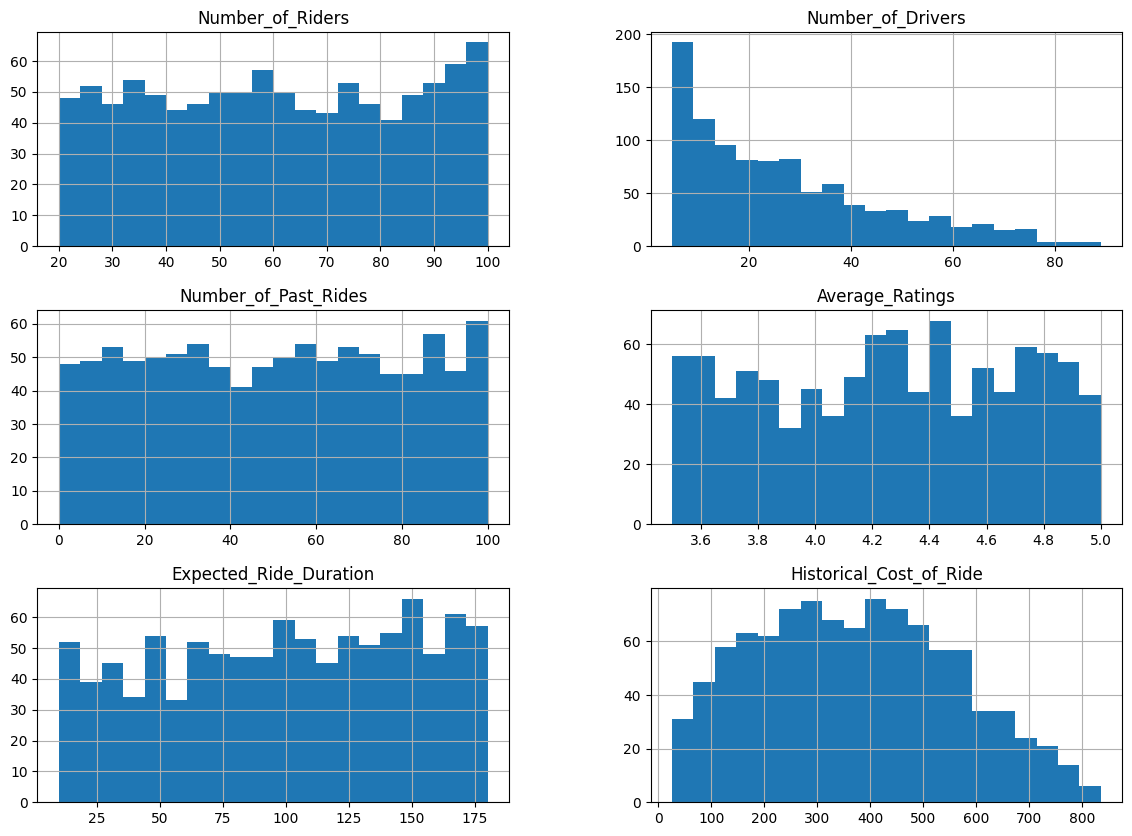

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(14, 10))
plt.show()


In [ ]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
data['Location_Category'].value_counts()
#, 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type'

,count
Location_Category,
Urban,346
Rural,332
Suburban,322


In [ ]:
data['Customer_Loyalty_Status'].value_counts()

,count
Customer_Loyalty_Status,
Silver,367
Regular,320
Gold,313


In [ ]:
data['Time_of_Booking'].value_counts()

,count
Time_of_Booking,
Night,276
Afternoon,247
Morning,246
Evening,231


In [ ]:
data['Vehicle_Type'].value_counts()

,count
Vehicle_Type,
Premium,522
Economy,478


Plot the counts of each category for the categorical features.

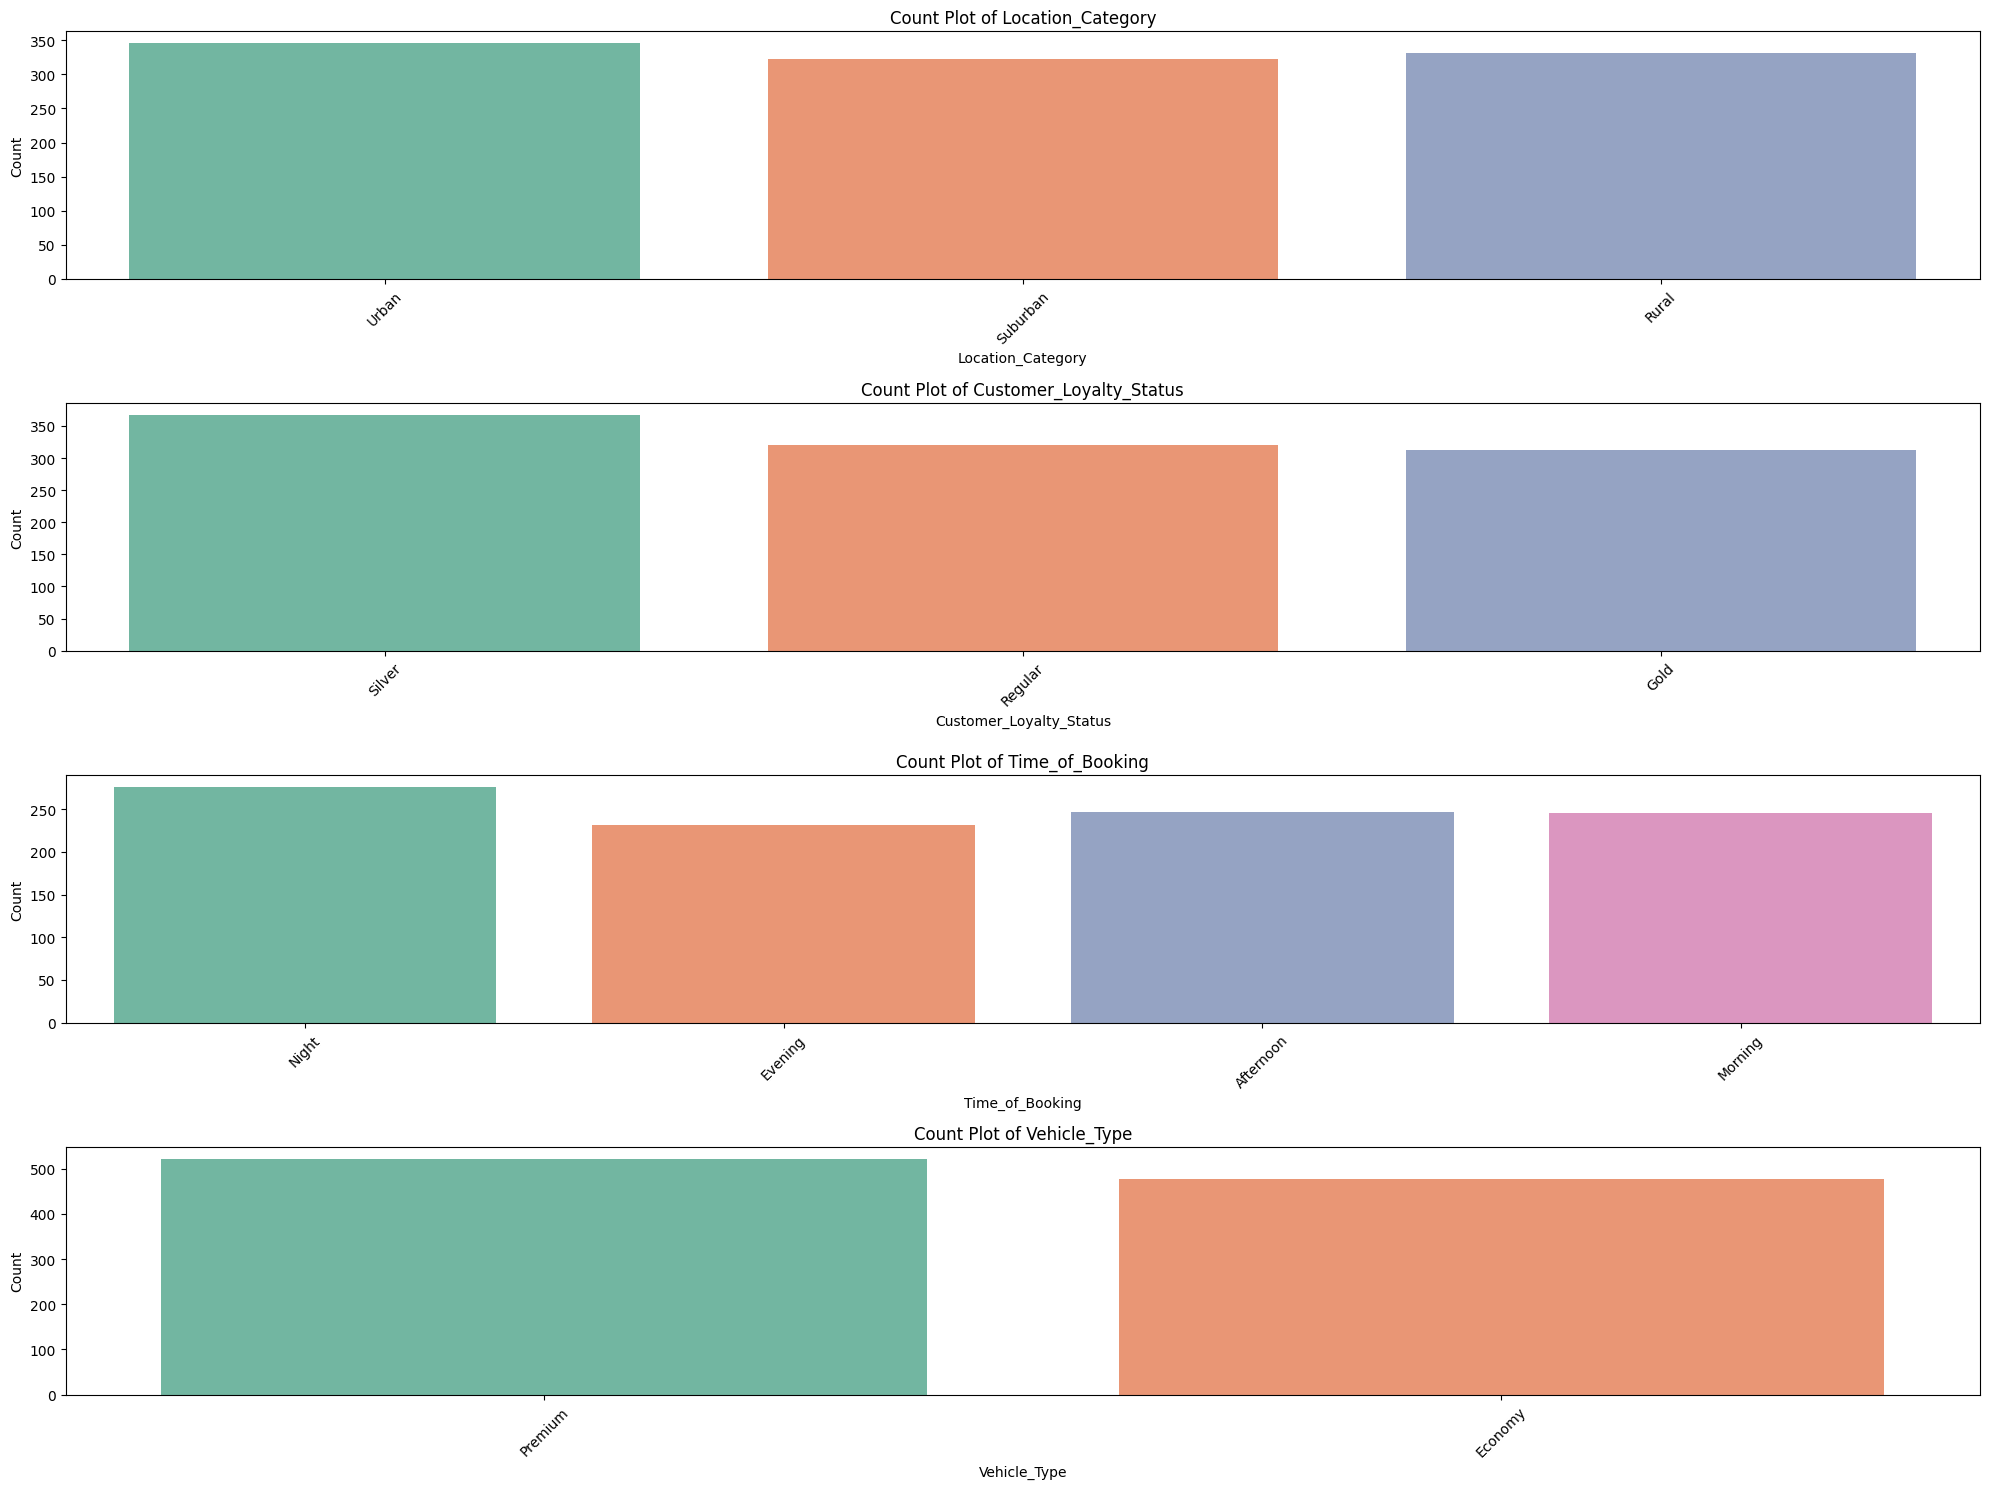

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']  # Replace with your categorical columns

# Plotting
plt.figure(figsize=(20, 15))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(x=feature, data=data, palette='Set2')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate category labels for better readability

plt.tight_layout()
plt.show()

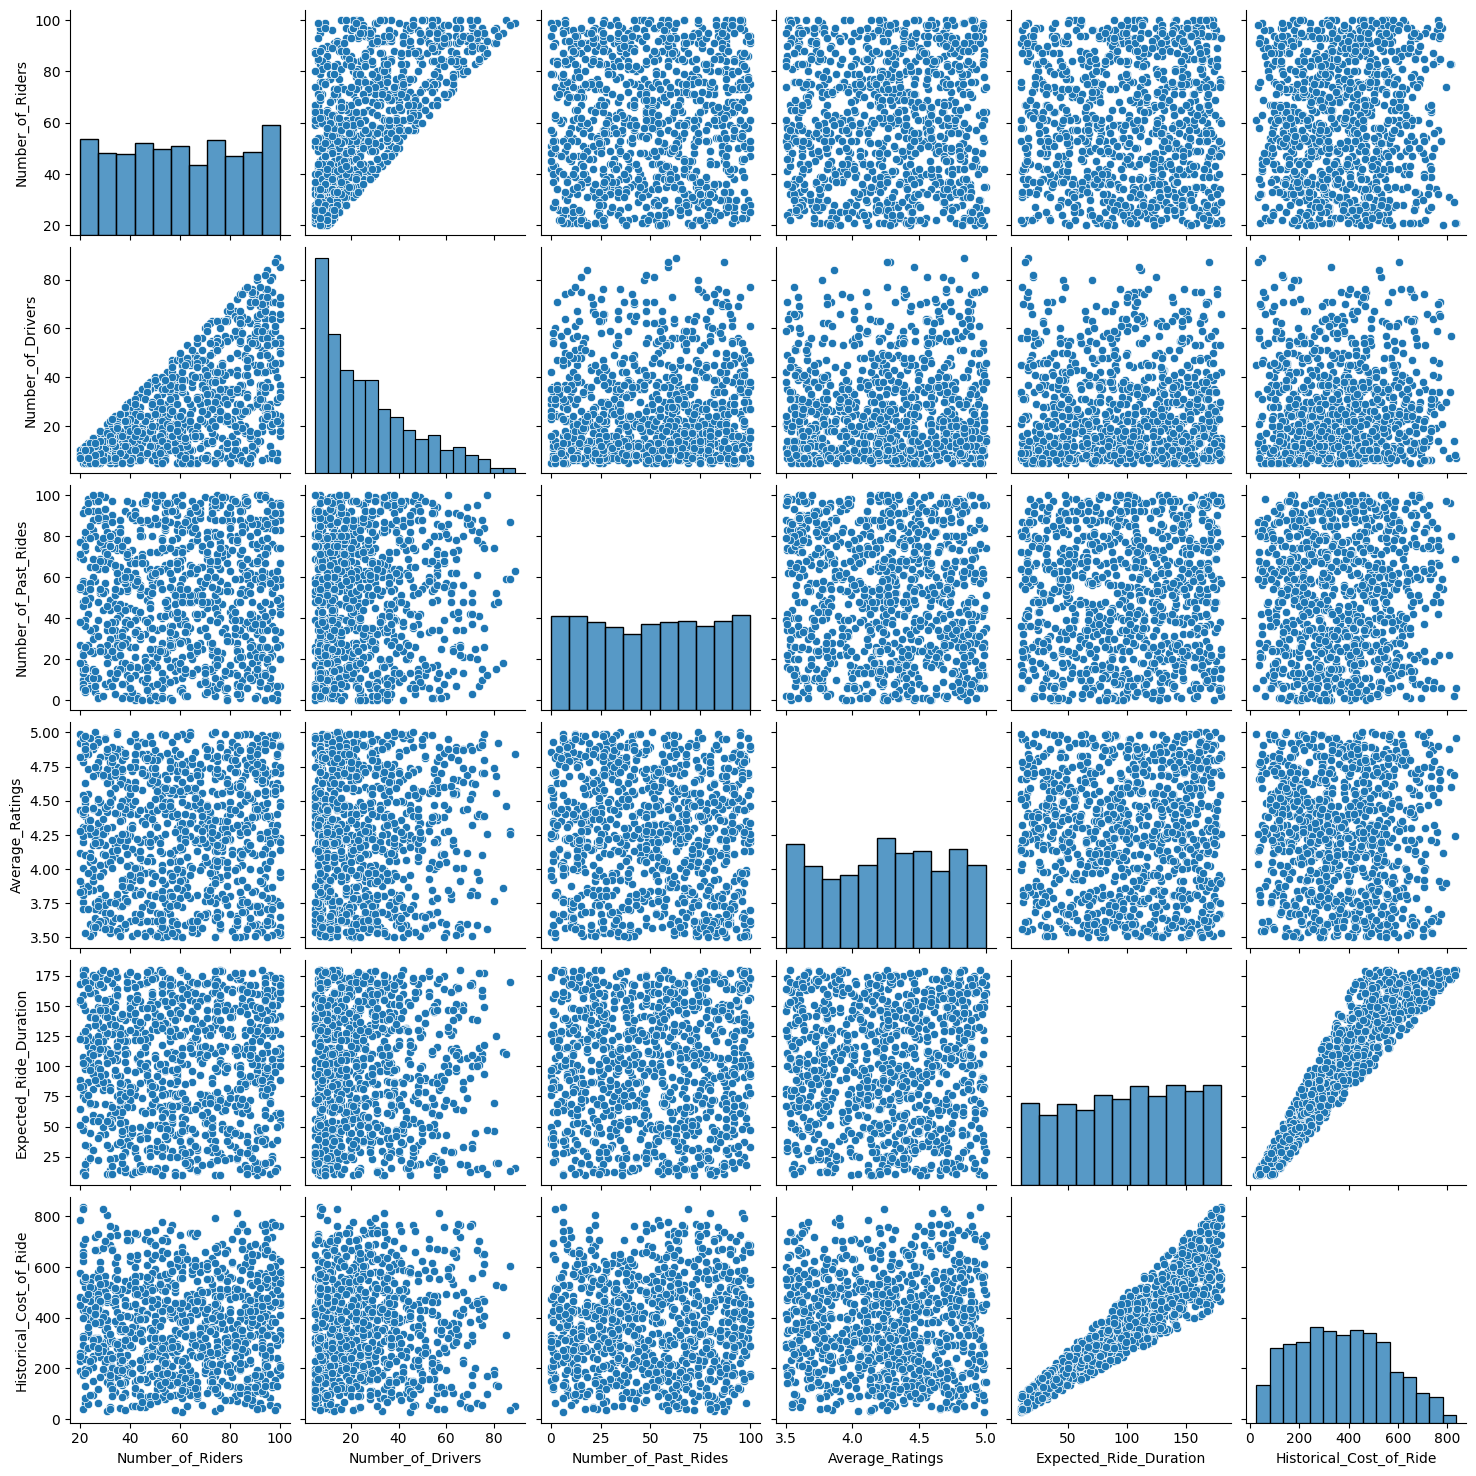

In [ ]:
numerical_data = data[['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
                       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']]

sns.pairplot(numerical_data, diag_kind='hist')
plt.show()

Perform Bivariate Analysis to explore the relationships between the target variable (Historical_Cost_of_Ride) and the other features. (Hint: use scatter plots of numerical features against the Historical_Cost_of_Ride)

numerical_cols: This list contains the names of the numerical columns in the dataset that are to be analyzed.

Columns to be Plotted: All the columns except the last one (Historical_Cost_of_Ride) will be plotted against the Historical_Cost_of_Ride column.

num_plots: This variable counts how many numerical columns (excluding Historical_Cost_of_Ride) are going to be plotted.

n_cols: This sets the number of columns in the grid of plots (2 columns).

n_rows: This calculates the number of rows needed in the grid based on the number of plots and columns. The formula (num_plots + 1) // n_cols ensures that any remainder in the division adds an additional row.

plt.subplots(): This creates a grid of subplots with n_rows rows and n_cols columns.

figsize: Sets the size of the entire figure, where the width is fixed at 14 units, and the height scales with the number of rows.

hspace and wspace: Adjust the horizontal and vertical spacing between plots.

axes.flatten(): Converts the 2D array of axes (subplots) into a 1D array to make indexing easier in the next steps.

This loop iterates through each numerical column (except Historical_Cost_of_Ride).

sns.scatterplot(): Creates a scatter plot for each numerical column against Historical_Cost_of_Ride.

set_title, set_xlabel, set_ylabel: Set the title, x-label, and y-label for each subplot, respectively.

If there are more subplots than needed (for instance, if the number of plots isn't an exact multiple of n_cols), this loop removes the extra subplots that were created but not used.

plt.tight_layout(): Automatically adjusts subplot parameters to give specified padding, ensuring that the subplots don't overlap.
plt.show(): Renders the plot on the screen.

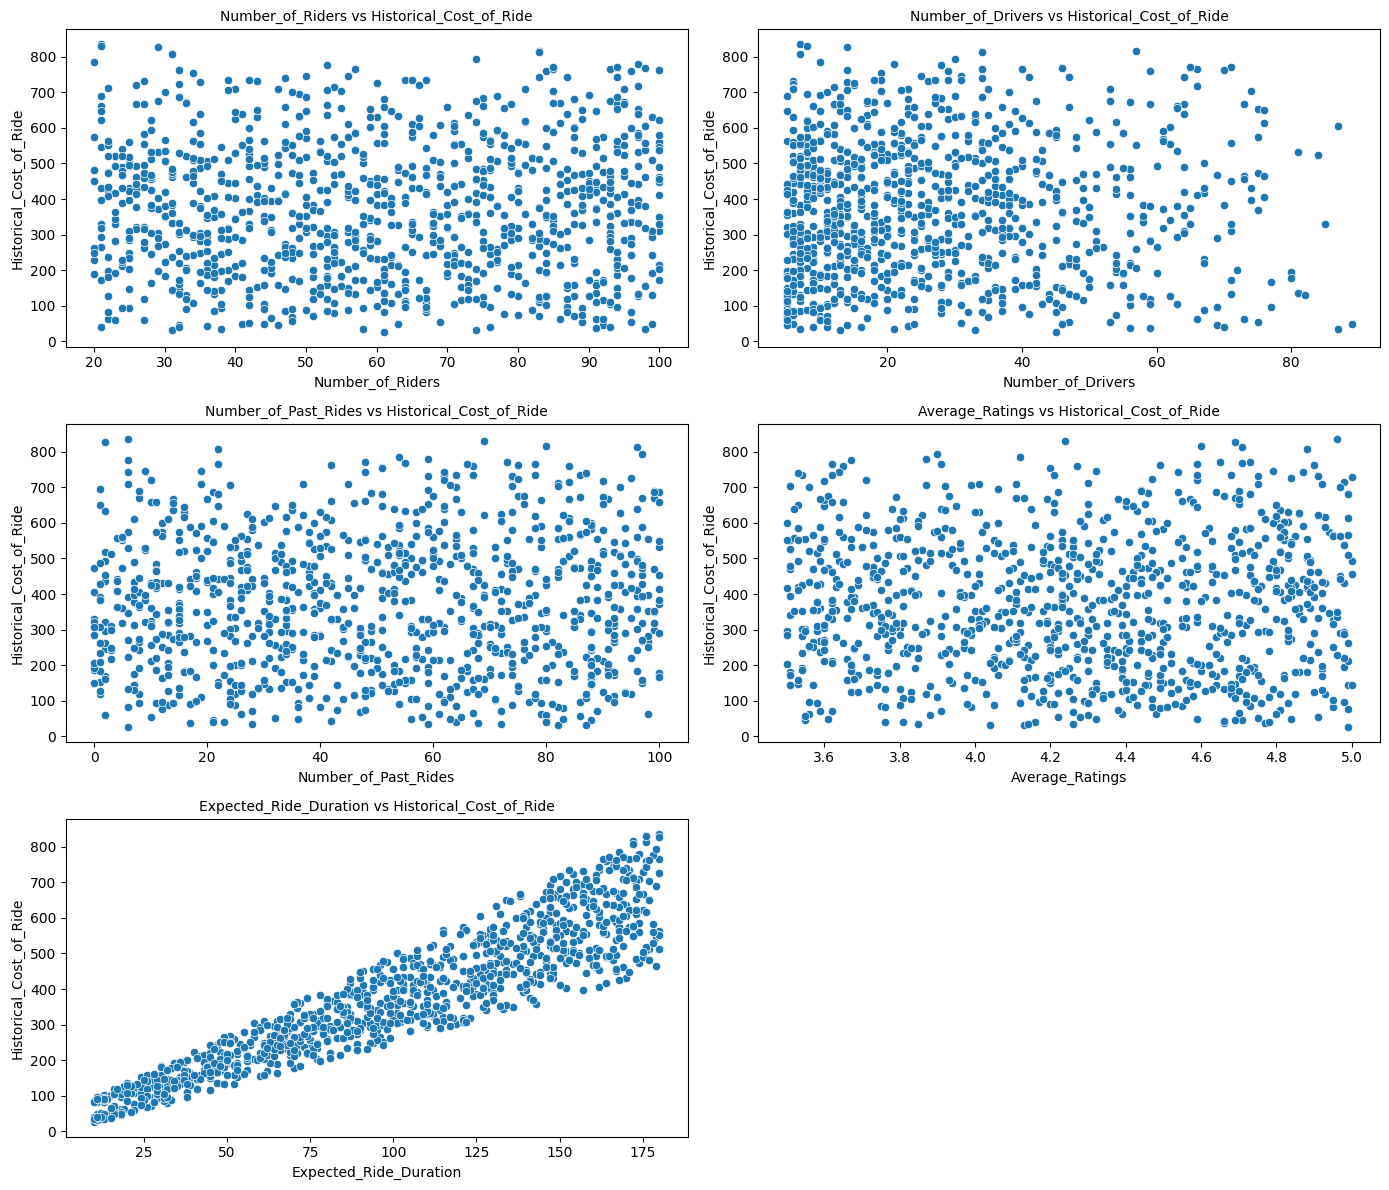

In [ ]:
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes = axes.flatten()

# plot each numerical column against the historical cost.
for i, col in enumerate(numerical_cols[:-1]):
    sns.scatterplot(data=data, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Examine how the categorical features relate to the Historical_Cost_of_Ride (Hint: use box plots to explore the variance in ride costs across different categories)

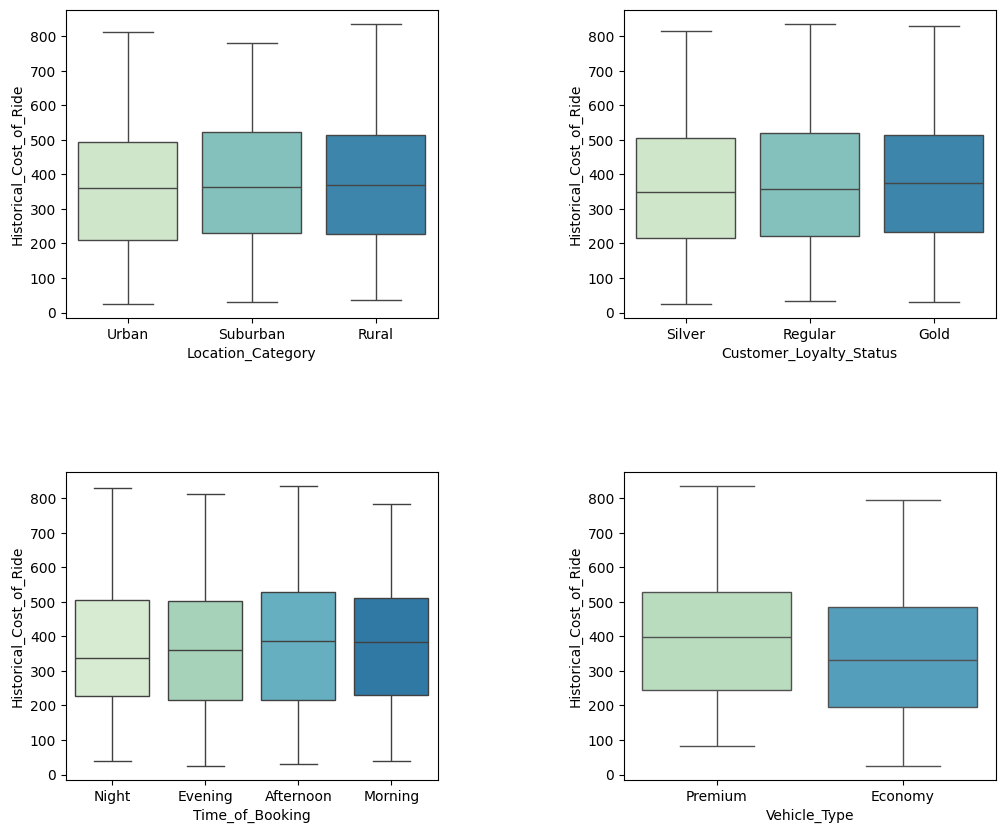

In [ ]:
cat = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

# create subplots
plt.figure(figsize=(12,10))

for i, c in enumerate(cat, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=data['Historical_Cost_of_Ride'], x=data[c],  palette='GnBu')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

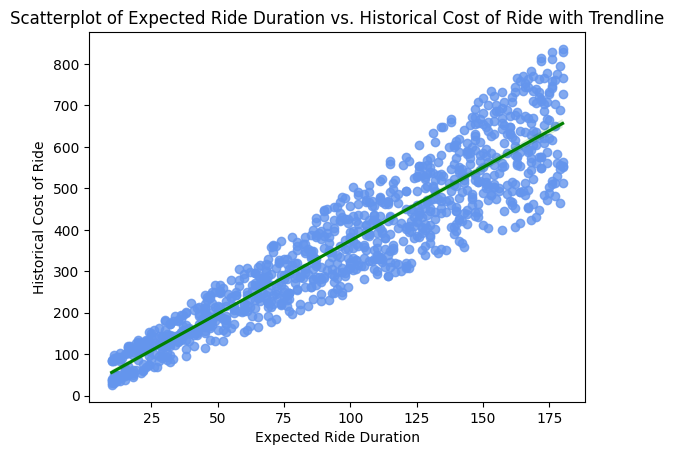

In [ ]:
sns.regplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=data,
            scatter=True, color='cornflowerblue', line_kws={"color": "green"})

plt.title('Scatterplot of Expected Ride Duration vs. Historical Cost of Ride with Trendline')
plt.xlabel('Expected Ride Duration')
plt.ylabel('Historical Cost of Ride')
plt.show()

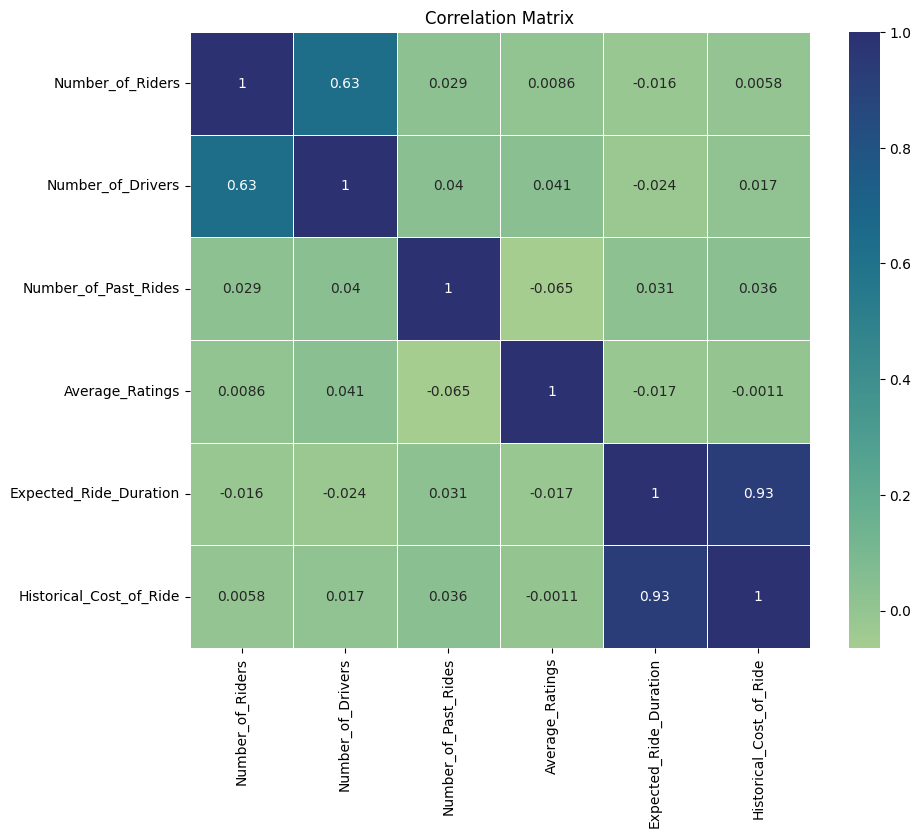

In [ ]:
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Give a short summary of insights gathered from EDA for Feature Selection and list the features identified as potentially important for predicting ride costs.

Expected_Ride_Duration shows a linear relationship with Historical_cost_of_Ride.

Variance in location show significant variance in cost.

Variations in costs indicate an influence of demand at different times.

Cost changes with different vehicles types.

The other numerical features (Number_of_Riders, Number_of_Drivers, Number_of_Past_Rides, Average_Ratings) do not show strong linear relationships with the target variable but could still be useful, especially when combined with other features or through engineered features that capture non-linear relationships or interactions.

